# Основы работы с табличными данными

#### Полезные ссылки
1. https://pandas.pydata.org/docs/
2. https://matplotlib.org/stable/index.html

### Базовые преобразования данных

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from os import path

df = pd.read_csv(path.join('Assignments', '3. Data preparation', 'data', 'train.csv'))
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### 1.1 Выведите 15 последних строк датасета

In [4]:
# Место для вашего кода :)
df.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


##### 1.2 Удалите колонки PassengerId, Ticket и Name

In [5]:
# Место для вашего кода :)
df = df.drop(['PassengerId', 'Ticket', 'Name'], axis=1 )
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


##### 1.3 Выведите количество пропущенных значений в каждом столбце.

In [6]:
# Место для вашего кода :)
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

##### 1.4 Заполните пропуски в колонке Age средним значением, в колонке Embarked модой.

После этого удалите все строки, в которых всё ещё остались незаполненные поля.

Какими ещё значениями можно заменить пропуcки?

In [7]:
# Место для вашего кода :)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df = df.dropna(axis=0, how='any')
df.isna().sum()


/var/folders/ss/kpmpr51x6bqc4fmwrx3vq3s00000gn/T/ipykernel_37571/79356538.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/var/folders/ss/kpmpr51x6bqc4fmwrx3vq3s00000gn/T/ipykernel_37571/79356538.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

##### 1.5 Добавье три новых бинарных признака: входит ли человек в группу от 20 до 35 лет, от 35 до 50, от 50 до 80.
##### Выведите количество объектов в каждой новой колонке.

In [8]:
# Место для вашего кода :)
df['20-35'] = df['Age'].apply(lambda x: True if 20<x<=35 else False)
df['35-50'] = df['Age'].apply(lambda x: True if 35<x<=50 else False)
df['50-80'] = df['Age'].apply(lambda x: True if 50<x<=80 else False)
df

/var/folders/ss/kpmpr51x6bqc4fmwrx3vq3s00000gn/T/ipykernel_37571/2807376035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['20-35'] = df['Age'].apply(lambda x: True if 20<x<=35 else False)
/var/folders/ss/kpmpr51x6bqc4fmwrx3vq3s00000gn/T/ipykernel_37571/2807376035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['35-50'] = df['Age'].apply(lambda x: True if 35<x<=50 else False)
/var/folders/ss/kpmpr51x6bqc4fmwrx3vq3s00000gn/T/ipykernel_37571/2807376035.py:4: SettingWithCopyWarning: 
A value is 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,20-35,35-50,50-80
1,1,1,female,38.0,1,0,71.2833,C85,C,False,True,False
3,1,1,female,35.0,1,0,53.1000,C123,S,True,False,False
6,0,1,male,54.0,0,0,51.8625,E46,S,False,False,True
10,1,3,female,4.0,1,1,16.7000,G6,S,False,False,False
11,1,1,female,58.0,0,0,26.5500,C103,S,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,D35,S,False,True,False
872,0,1,male,33.0,0,0,5.0000,B51 B53 B55,S,True,False,False
879,1,1,female,56.0,0,1,83.1583,C50,C,False,False,True
887,1,1,female,19.0,0,0,30.0000,B42,S,False,False,False


##### 1.6* Преобразование категориальных данных.
Как вы можете заметить по данным, существуют разные типы значений: категориальные и числовые (на самом деле, существуют и другие).
Для анализа данных принято категориальные значения приводить в числовой вид. Существуют различные способы таких преобразований.
Одни из самых простых - label encoding и one hot encoding.

1. Label encoding: каждому уникальному значению в колонке присваиваем собственный номер от 0 до (количество классов - 1) 
2. One hot encoding: пусть признак содержит n уникальных значений. Мы создаем n новых бинарных признаков, отражающих, имеется ли данный признак у объекта (1) или нет (0).
Пример:

(тут будет картинка)

В последующих занятиях мы детально разберем подобные преобразования и разницу между ними.

Теперь задание: создайте 2 новых датафрейма: one_hot_encoded_dataframe и label_encoded_dataframe, 
в которых категориальные признаки будут закодированы с помощью one hot encoding и label encoding соотствественно.

In [9]:
one_hot_encoded_dataframe = ...
label_encoded_dataframe = ...

# Место для вашего кода :)

### Визуализация 

##### 2.1 Для колонок Pclass, Sex, Age, Parch, Embarked постройте гистограмму с помощью matplotlib.

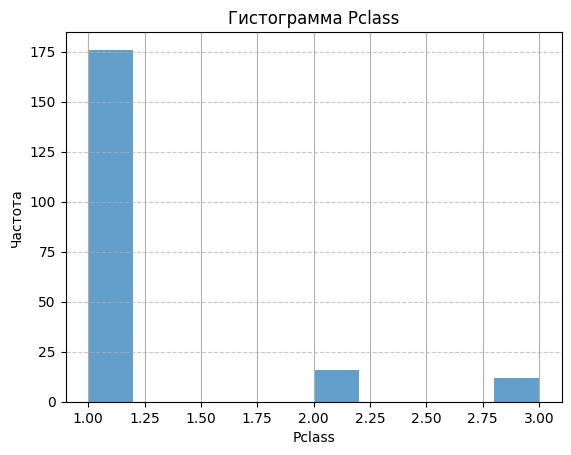

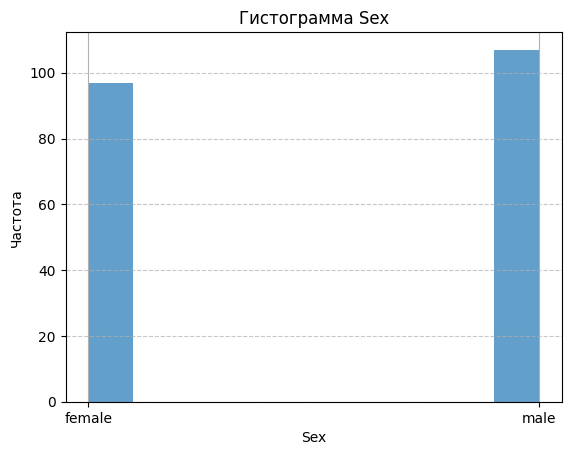

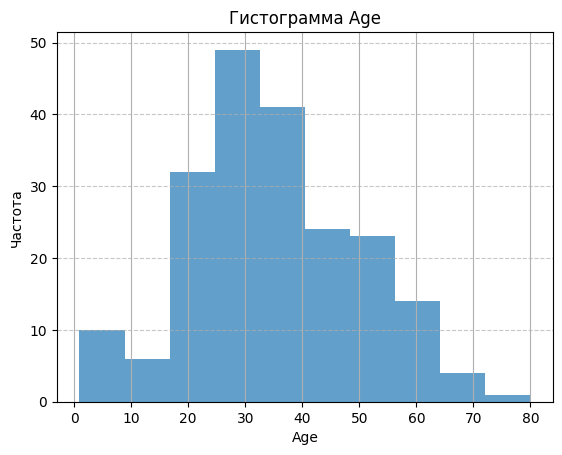

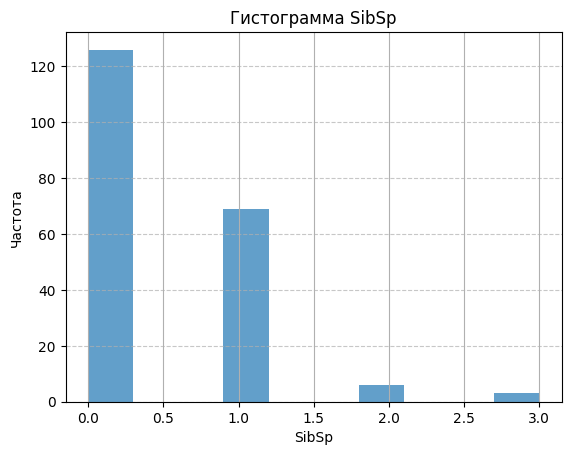

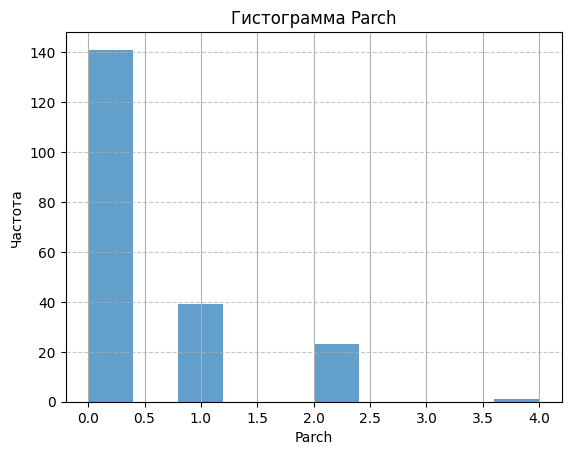

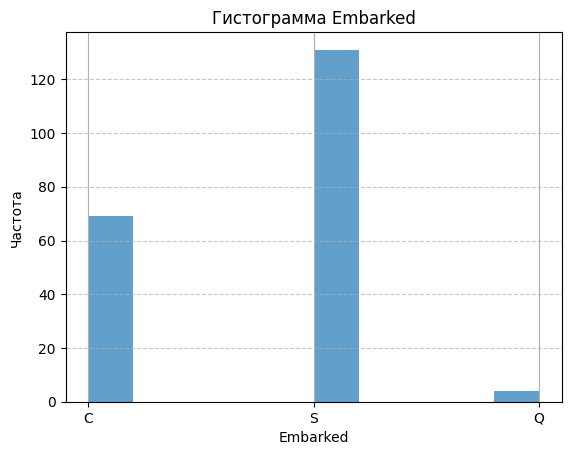

In [10]:
# Место для вашего кода :)
property = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Embarked"]
for name in property:
    df[name].hist(bins=10, alpha=0.7)
    plt.xlabel(name)
    plt.ylabel("Частота")
    plt.title(f"Гистограмма {name}")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


##### 2.2 Постройте круговую диаграмму, отражающую распределение значений колонки Survived

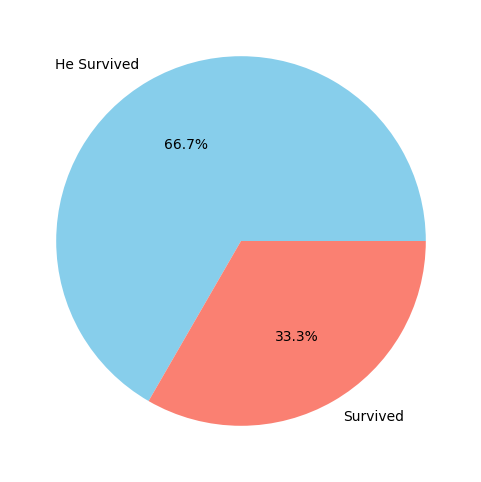

In [28]:
# Место для вашего кода :)
plt.figure(figsize=(6, 6))
survived = df["Survived"].value_counts()
survived.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], labels=["Не Survived", "Survived"])
plt.ylabel("")  # Убираем подпись оси
plt.show()